# Problema 
_(Fonte: LEMOS DOS SANTOS, Vinícius et al. APLICAÇÃO DO MÉTODO DE NEWTON, SECANTE E BISSEÇÃO PARA DEFINIÇÃO DE PREÇO ADEQUADO À VENDA. Santana do Livramento: Universidade Federal do Pampa, 2018.)_

A empresa fictícia Lighter Fire, pretende lançar um isqueiro no mercado. Para isso
realizou uma pesquisa de mercado para obter previsões de demanda semestral para diferentes
preços de venda a fim de obter o preço que maximize seus lucros. O custo unitário de
produção é R$1,00, este preço permanecerá constante mesmo com variações de unidades
produzidas. O resultado dessa pesquisa pode ser observado na Tabela 1.


| Preço (R$) | Previsão de demanda | Previsão de lucro |
| -- | -- | -- |
| 2.0 | 500000  |  500000 |
| 2.5 | 450000 | 675000 |
| 3.0 | 350000 | 700000 |
| 3.5 | 200000 | 500000 |
| 4.0 | 40000 | 120000 |

Pretende-se determinar um polinômio que interpole os pontos dados, através da biblioteca numpy de álgebra linear.


# Solução

## Importação de bibliotecas

In [ ]:
##Importar biblioteca numpy

import numpy as np

## Polinômios

### Previsão demanda

Para resolver o problema precisamos calcular os coeficientes de um polinômio que possui os valores
da coluna __Previsão de demanda__ da tabela no seu domínio. É útil que tenhamos um método que, dado um valor $x \in R$ e um
vetor de coeficientes, nos retorna o valor do polinômio em $x$.

## Matriz de Vandermonde

Também é necessário descrever o sistema de equações como uma matriz, para que possamos resolver o problema
linearmente. A matriz de Vandermonde nos auxilia nesse processo descrevendo um conjunto de observações $x_i$
para o mesmo polinômio:

$$
\begin{bmatrix}
x_1^{n-1} & x_1^{n-2} & \dots & x_1^{1} & 1 \\
x_2^{n-1} & x_2^{n-2} & \dots & x_2^{1} & 1 \\
\dots \\
x_n^{n-1} & x_n^{n-2} & \dots & x_n^{1} & 1 \\
\end{bmatrix}
\begin{bmatrix}
 a_{n-1} \\ a_{n-2} \\ \dots \\  a_0
\end{bmatrix}
=
\begin{bmatrix}
y_1 \\ y_2 \\ \dots \\ y_n
\end{bmatrix}
$$


Resolvendo esse sistema obtemos o polinômio interpolador para os valores do problema.
$$
p(x) = a_{n-1}x^{n-1} + a_{n-2}x^{n-2} + \dots  + a_0x^0
$$

No enunciado do problema temos 5 amostras de valores, portanto nossa matriz de coeficientes $A$ pode ser definida por:
$$
\begin{bmatrix}
 2.0^{4} &   2.0^{3} &   2.0^{2}   &  2.0^{1}  & 1 \\
 2.5^{4} &   2.5^{3} &   2.5^{2}   &  2.5^{1}  & 1 \\
 3.0^{4} &   3.0^{3} &   3.0^{2}   &  3.0^{1}  & 1 \\
 3.5^{4} &   3.5^{3} &   3.5^{2}   &  3.5^{1}  & 1 \\
 4.0^{4} &   4.0^{3} &   4.0^{2}   &  4.0^{1}  & 1 
\end{bmatrix}
\begin{bmatrix}
 a_4 \\ a_3 \\ a_2 \\ a_1 \\ a_0
\end{bmatrix}
=
\begin{bmatrix}
500000 \\ 450000 \\ 350000 \\ 200000 \\ 40000
\end{bmatrix}
$$

Resolvendo esse sistema obtemos o polinômio interpolador para os valores do problema.
$$
p(x) = a_4x^4 + a_3x^3 + a_2x^2 + a_1x + a_0x^0
$$

## Demanda prevista

### Resolução sistema

In [ ]:
##Definir variáveis demanda prevista

x = [2.0, 2.5, 3.0, 3.5, 4.0]
y = [500000, 450000, 350000, 200000, 40000]

In [ ]:
##Resolver matriz 5x5 dos coeficientes por numpy

x = np.array( [[x[0]**4, x[0]**3, x[0]**2, x[0], x[0]**0],
               [x[1]**4, x[1]**3, x[1]**2, x[1], x[1]**0],
               [x[2]**4, x[2]**3, x[2]**2, x[2], x[2]**0],
               [x[3]**4, x[3]**3, x[3]**2, x[3], x[3]**0],
               [x[4]**4, x[4]**3, x[4]**2, x[4], x[4]**0]])

y = np.array(y)

c = np.linalg.solve(x, y)

print(f"a4: {c[0]:.2f} a3: {c[1]:.2f} a2: {c[2]:.2f} a1: {c[3]:.2f} a0: {c[4]:.2f}")


a4: 26666.67 a3: -293333.33 a2: 1093333.33 a1: -1776666.67 a0: 1600000.00


### Polinômio demanda prevista

$$p(x) = 26666.67x^4 - 293333.33x^3 + 1093333.33x^2 - 1776666.67x + 1600000.0
0
$$

### Análise gráfica do polinômio

<ipython-input-4-99c4f4f1a1df>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


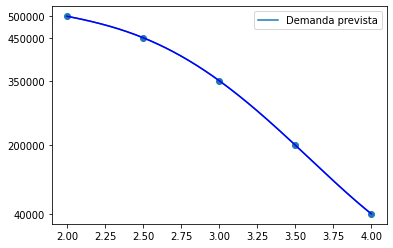

In [ ]:
import matplotlib.pyplot as plt
import numpy 

##Gráfico da demanda
x1 = np.arange(2.0, 4.0, 0.001)
y1 = c[0]*x1**4 + c[1]*x1**3 + c[2]*x1**2 + c[3]*x1**1 + c[4]

##Mudança escala eixo y
plt.yticks(y)

##Pontos x e y
x = [2.0, 2.5, 3.0, 3.5, 4.0]
y = [500000, 450000, 350000, 200000, 40000]

ax = plt.subplot()
ax.plot(x1, y1, label='Demanda prevista')

plt.scatter(x, y)

plt.plot(x1, y1, 'b')

ax.legend()
plt.show()

## Lucro previsto

### Resolução sistema

In [ ]:
##Definir variáveis lucro previsto

x = [2.0, 2.5, 3.0, 3.5, 4.0]
y = [500000, 675000, 700000, 500000, 120000]

In [ ]:
##Resolver matriz 5x5 dos coeficientes por numpy

x = np.array( [[x[0]**4, x[0]**3, x[0]**2, x[0], x[0]**0],
               [x[1]**4, x[1]**3, x[1]**2, x[1], x[1]**0],
               [x[2]**4, x[2]**3, x[2]**2, x[2], x[2]**0],
               [x[3]**4, x[3]**3, x[3]**2, x[3], x[3]**0],
               [x[4]**4, x[4]**3, x[4]**2, x[4], x[4]**0]])

y = np.array(y)

c = np.linalg.solve(x, y)

print(f"a4: {c[0]:.2f} a3: {c[1]:.2f} a2: {c[2]:.2f} a1: {c[3]:.2f} a0: {c[4]:.2f}")


a4: 80000.00 a3: -980000.00 a2: 4030000.00 a1: -6530000.00 a0: 4000000.00


### Polinômio lucro previsto

$$
p(x) = 80000.00x^4 - 980000.00x^3 + 4030000.00x^2 - 6530000.00x + 4000000.00
$$

### Análise gráfica do polinômio




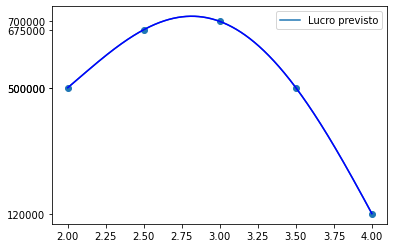

In [ ]:
import matplotlib.pyplot as plt
import numpy 

##Gráfico de lucro
x1 = np.arange(2.0, 4.0, 0.001)
y1 = c[0]*x1**4 + c[1]*x1**3 + c[2]*x1**2 + c[3]*x1**1 + c[4]

##Mudança escala eixo y
plt.yticks(y)

##Pontos x e y
x = [2.0, 2.5, 3.0, 3.5, 4.0]
y = [500000, 675000, 700000, 500000, 120000]

ax = plt.subplot()
ax.plot(x1, y1, label='Lucro previsto')

plt.scatter(x, y)

plt.plot(x1, y1, 'b')

ax.legend()
plt.show()

## Métodos numéricos para encontrar o lucro máximo previsto
_(Fonte: GOMES RUGGIERO, Márcia A.; DA ROCHA LOPES, Vera Lúcia. Cálculo Numérico: Aspectos teóricos e computacionais. 2. ed. São Paulo: Pearson Makron Books, 2019.)_

Para determinarmos o ponto máximo da função lucro precisamos calcular a raiz real da sua função derivada. Para isso, já que a função é um polinômio de grau maior que três, usaremos métodos numéricos como o de Newton, da secante e da bisseção. Os métodos consistem basicamente em a partir de uma aproximação inicial para a raiz refinar essa aproximação através de um processo iterativo.

## Método de Newton

### Função de iteração:

$\phi(x) = x - \frac{f(x)}{f'(x)}$

Gera uma série que tende a raiz real da função, e como a ordem de convergência é quadrática garante que a cada iteração "acerte" duas casas decimais da raiz fazendo com que 3 iterações sejam suficientes para uma precisão de duas casas decimais.

In [ ]:
import sympy as sp
import time

x = sp.Symbol('x')

#definir função lucro 
flucro = 80000*x**4 - 980000*x**3 + 4030000*x**2 - 6530000*x + 4000000.00

#definir derivadas
#definir primeira derivada da função lucro prevista
f = flucro.diff(x)

#definir segunda derivada da função lucro prevista
df = f.diff(x)

print(f"f'= {f}\nf''= {df}")

f'= 320000*x**3 - 2940000*x**2 + 8060000*x - 6530000
f''= 960000*x**2 - 5880000*x + 8060000


In [ ]:
import sympy as sp


#definir derivada função lucro 
def f(x):
  return 320000*x**3 - 2940000*x**2 + 8060000*x - 6530000

#testar alguns preços e estudar os sinais da função
print(f'    0    |    1     |   2    |   2.5    |    3    |   4     |   5    |\n{f(0)} | {f(1)} | {f(2)} | {f(2.5)} | {f(3)} | {f(4)} | {f(5)} |')


    0    |    1     |   2    |   2.5    |    3    |   4     |   5    |
-6530000 | -1090000 | 390000 | 245000.0 | -170000 | -850000 | 270000 |


Pelo estudo do sinal da função, percebe-se que o ponto máximo está entre $[2.5, 3]$, pois é onde o sinal da função derivada "troca" de positivo para negativo, indicando que a função apresenta um valor máximo neste intervalo.

In [ ]:
inicio = time.time()
#importar bibliotecas
from sympy import *

#definir derivada da função lucro prevista
def f(x):
  return 320000*x**3 - 2940000*x**2 + 8060000*x - 6530000

#definir segunda derivada da função lucro prevista
def df(x):
  return 960000*x**2 - 5880000*x + 8060000

#definir função lucro 
def flucro(x):
  return 80000*x**4 - 980000*x**3 + 4030000*x**2 - 6530000*x + 4000000.00

#definir função demanda
def fdemanda(x):
  return 26666.67*x**4 - 293333.33*x**3 + 1093333.33*x**2 - 1776666.67*x + 1600000.0


#definir parâmetros  

x = symbols('x')
x0 = 2.5 #x inicial
k = 3 #iteracao

#metodo newton
for i in range(k):
  sn = x0 - (f(x0)/df(x0))
  x0 = sn

fim = time.time()
tempo = fim - inicio
  
print(f"O preço que maximiza o lucro é R${sn}")
print(f"O lucro máximo será de R${flucro(sn)}")
print(f"A demanda será de {round(fdemanda(sn))} unidades")
print(f"Tempo de execução: {tempo}")


O preço que maximiza o lucro é R$2.8147972753348047
O lucro máximo será de R$715584.6087796651
A demanda será de 393739 unidades
Tempo de execução: 0.0018930435180664062


## Método da Secante 
Gera uma série que tende a raiz real da função, com uma convergência próxima da quadrada fazendo com que 3 iterações sejam suficientes para uma precisão de duas casas decimais.
### Função de iteração:

$\phi(x_k) = x_k - \frac{f(x_k)(x_k-x_{k-1})}{f(x_k)-f(x_{k-1})}$

In [ ]:
inicio = time.time()
#metodo secante
#definir parâmetros do intervalo da precisão e das iterações 

xs0 = 2.5 #inicio intervalo
xs1 = 2.7 #ponto proximo inicio intervalo
e = 0.001 #precisao
k = 3 #iteracao
i = 0

while True:
  xs2 = xs1 - f(xs1)*(xs1-xs0)/(f(xs1)-f(xs0))
  
  if i == k:
    break;

  else:
    xs0 = xs1
    xs1 = xs2  

    i = i + 1

fim = time.time()
tempo = fim - inicio

print(f"O preço pelo método da secante é R${xs2}")
print(f"O lucro máximo será de R${flucro(xs2)}")
print(f"A demanda será de {round(fdemanda(xs2))} unidades")
print(f"Tempo de execução: {tempo}")

O preço pelo método da secante é R$2.8147970162080047
O lucro máximo será de R$715584.6087796949
A demanda será de 393739 unidades
Tempo de execução: 0.0003790855407714844


## Método da Bisseção 
Seja uma função $f(x)$ contínua em $[a, b]$ e tal que $f(a)f(b)<0$.\
Vamos supor, para simplificar, que o intervalo $(a, b)$ contenha uma única raiz da equação $f(x) = 0$.\
O objetivo desse método é reduzir a amplitude do intervalo que contém a raiz até atingir-se a precisão desejada: $(b-a)<\epsilon$, usando para isso a sucessiva divisão de $[a, b]$ ao meio.\
O número de iterações se dá pela expressão:

$k > \frac{log(b_0 - a_0) - log(\epsilon)}{log(2)}.$

In [ ]:
inicio = time.time()
import numpy as np

#definir parâmetros do intervalo da precisão e das iterações 

a = 2.5 #inicio intervalo
b = 3.0 #fim intervalo
e = 0.001 #precisao
k = floor((np.log10(b-a)-np.log10(e))/np.log10(2)) #iteracao


for i in range(k):
  if (b - a) < e:
    sb = (a + b)/2 

  m = f(a)
  sb = (a + b)/2

  if m*f(sb) > 0:
    a = sb
  else:
    b = sb
 
fim = time.time()
tempo = fim - inicio

print(f"O preço pelo método da bisseção é R${sb}")
print(f"O lucro máximo será de R${flucro(sb)}")
print(f"A demanda será de {round(fdemanda(sb))} unidades")
print(f"Tempo de execução: {tempo}")

O preço pelo método da bisseção é R$2.814453125
O lucro máximo será de R$715584.5564615428
A demanda será de 393813 unidades
Tempo de execução: 0.001068115234375


## Comparação entre os métodos 

Em relação as iterações, os métodos de Newton e da Secante precisaram de 3. Entretanto o grau de convêrgencia é diferente: o primeiro tem grau 2 e o segundo aproximadamente 1,61. Quer dizer que para precisões maiores, o número de iterações mudaria. \
O método da bisseção precisou de 8 iterações, porém como ainda são poucas iterações, não apresentou grande diferença no tempo de execução. 
Em relação aos algoritmos, o de Newton foi o que demandou mais esforço computacional, pois precisou definir as derivadas. O da bisseção precisou de muitas condições. O mais simples foi o da Secante. 
Todos apresentaram resultados satisfatórios de acordo com a precisão demandada, porém, para o problema aqui apresentado, o método da Secante mostrou-se mais eficaz.

|  | Newton | Secante | Bisseção |
| -- | -- | -- | -- |
| Dados iniciais | $x_0$ = 2.5   |  $x_0=2.5$  $x_1=2.7$ | [2.5, 3.0] |
|  x | 2.814797 | 2.814797 | 2.814453 |
| f(x) | 715584.608779 | 715584.608779 | 715584.556461
| Iterações | 3 | 3 | 8 
| Tempo | 0.001893s | 0.000379s | 0.001068
